# Mortgage Loan Rates Forecast Model

# Data Engineering 

## Import Libraries

In [1]:
# Load API key and secret from environment variables
from dotenv import load_dotenv
load_dotenv()

# System libraries
import glob

# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm

# Plotting libraries 

## Data Collection

#### Load FRED Data

In [2]:
def merge_fred_csv_files(file_pattern):
    # Use glob to find all files matching the specified pattern
    file_list = glob.glob(file_pattern)

    # Initialize an empty list to store individual DataFrames
    dataframes = []

    # Iterate through each file in the file list
    for file in file_list:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file, parse_dates=['DATE'], index_col='DATE')

        # Add the DataFrame to the list of DataFrames
        dataframes.append(df)

    # Merge all the DataFrames in the list into a single DataFrame
    merged_df = pd.concat(dataframes, axis=1)

    return merged_df

In [3]:
file_path = '../datasets/fred/*.csv'
fred_df = merge_fred_csv_files(file_path)
display(fred_df)

,GDPC1,GS5,GS10,GS3,MORTGAGE30US,UNRATE,CPIAUCSL,FEDFUNDS,GDP
DATE,,,,,,,,,
1947-01-01,2034.450,NaN,NaN,NaN,NaN,NaN,21.48,NaN,243.164
1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,21.62,NaN,NaN
1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN
1947-04-01,2029.024,NaN,NaN,NaN,NaN,NaN,22.00,NaN,245.968
1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,21.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-01,NaN,NaN,3.46,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-06,NaN,NaN,NaN,NaN,6.28,NaN,NaN,NaN,NaN
2023-04-13,NaN,NaN,NaN,NaN,6.27,NaN,NaN,NaN,NaN


### Preselection of Variables

In [4]:
target_column = ['MORTGAGE30US']
feature_columns = ['UNRATE', 'GS10', 'FEDFUNDS']
fred_df = fred_df[target_column + feature_columns]
display(fred_df)

,MORTGAGE30US,UNRATE,GS10,FEDFUNDS
DATE,,,,
1947-01-01,NaN,NaN,NaN,NaN
1947-02-01,NaN,NaN,NaN,NaN
1947-03-01,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN
1947-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-04-01,NaN,NaN,3.46,NaN
2023-04-06,6.28,NaN,NaN,NaN
2023-04-13,6.27,NaN,NaN,NaN


## ValidMind Setup

In [5]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  api_key = "e22b89a6b9c2a27da47cb0a09febc001",
  api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
  project = "clgo0g0rt0000fjy6ozl9pb69"
)
  

True

In [6]:
df = fred_df
vm_dataset = vm.init_dataset(dataset=df)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


## Data Description

## Data Quality

### Frequency of the Series

**Handling Frequencies**

In [7]:
df = df.resample('MS').last()
vm_dataset = vm.init_dataset(dataset=df)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


# Exploratory Data Analysis

## Univariate Analysis

In [8]:
vm.test_plans.describe_plan("time_series_univariate_inspection")

Attribute,Value
ID,time_series_univariate_inspection
Name,TimeSeriesUnivariateInspection
Description,Test plan to perform univariate inspection tests.
Required Context,['dataset']
Tests,"TimeSeriesUnivariateInspectionHistogram (Metric), TimeSeriesUnivariateInspectionRaw (Metric), AutoAR (Metric)"
Test Plans,[]


In [9]:
test_plan_config = {
    "time_series_univariate_inspection_raw": {
        "columns": target_column + feature_columns
    },
    "time_series_univariate_inspection_histogram": {
        "columns": target_column + feature_columns
    },
    "auto_ar": {
        "max_ar_order": 3
    }
}

Running Metric: time_series_univariate_inspection_raw:  33%|███▎      | 1/3 [00:00<00:00,  2.30it/s]      

ValueError: Could not interpret value `Date` for parameter `x`

<Figure size 1000x600 with 0 Axes>

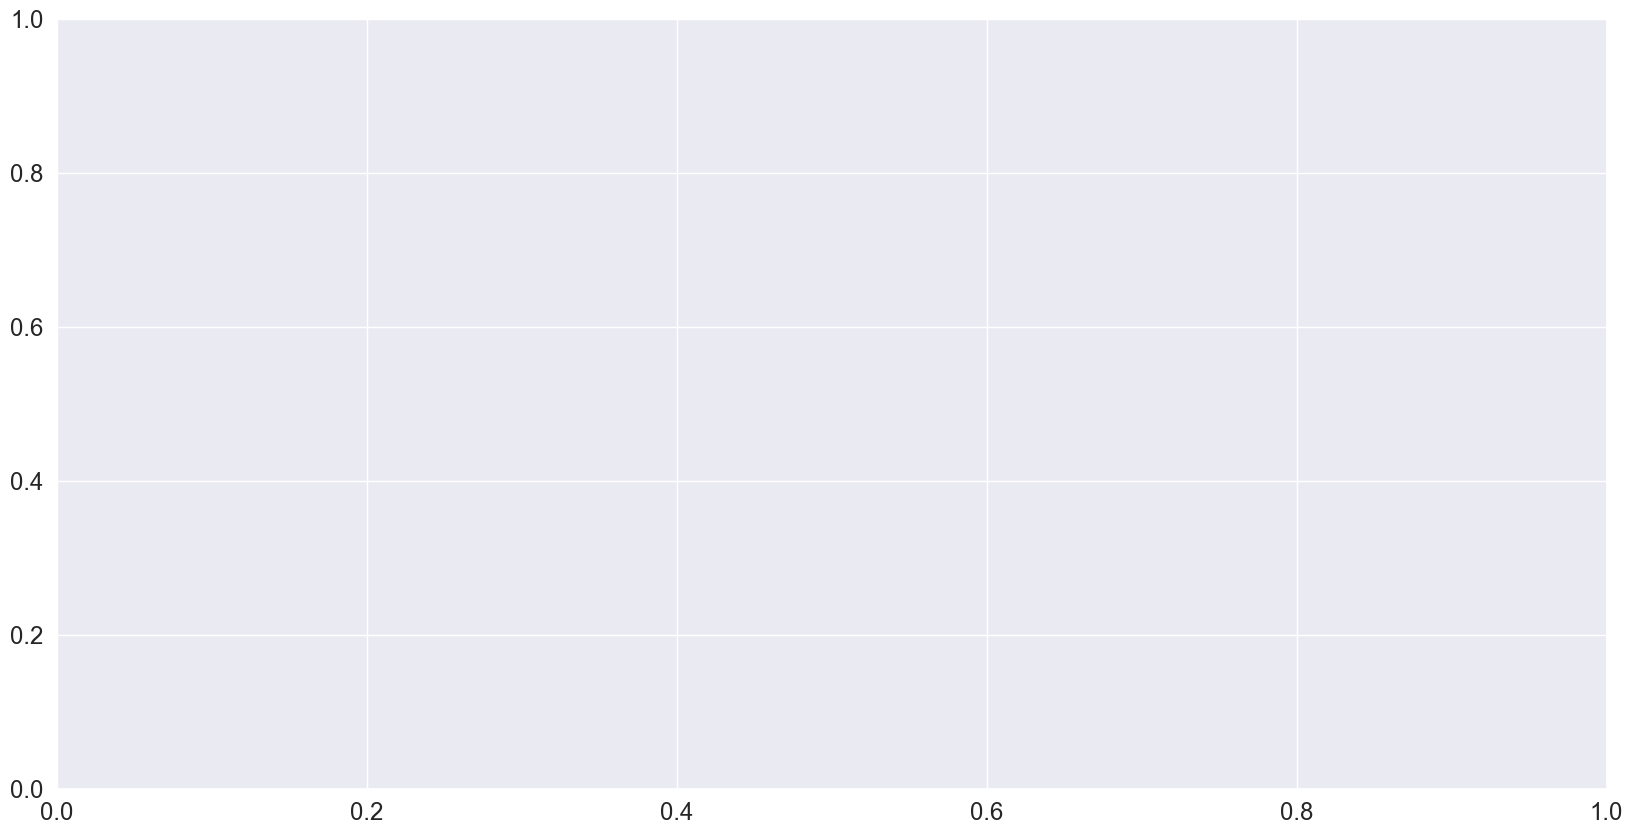

In [10]:
vm.run_test_plan("time_series_univariate_inspection", config=test_plan_config, dataset=vm_dataset)

## Multivariate Analysis

In [7]:
vm.test_plans.describe_plan("time_series_multivariate")

Attribute,Value
ID,time_series_multivariate
Name,TimeSeriesMultivariate
Description,Test plan to perform univariate inspection tests.
Required Context,['dataset']
Tests,"ScatterPlot (Metric), LaggedCorrelationHeatmap (Metric)"
Test Plans,[]


In [8]:
test_plan_config = {
    "scatter_plot": {
        "columns": target_column + feature_columns
    },
    "lagged_correlation_heatmap": {
        "target_col": target_column,
        "independent_vars": feature_columns
    },
}

In [9]:
vm.run_test_plan("time_series_multivariate", config=test_plan_config, dataset=vm_dataset)

Failed to log result: TestPlanMetricResult(result_id=scatter_plot, figures) for test plan result 'TestPlanMetricResult(result_id=scatter_plot, figures)':   0%|          | 0/2 [00:00<?, ?it/s]

Could not log figure to ValidMind API
{"code":"IntenalError","message":"Internal server error"}



Exception: {"code":"IntenalError","message":"Internal server error"}
